=== Crude Oil Fractions ===

Total energy required (kJ/s): 39940.00

Optimal heat recovery efficiency: 50.00%
Optimized total energy (kJ/s): 19970.00
Total energy saved (kJ/s): 19970.00


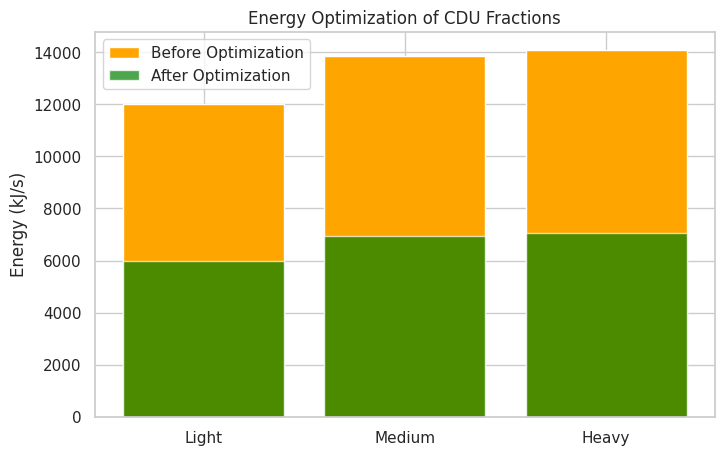


=== Energy Savings per Fraction ===


,Fraction,Energy_kJ,OptimizedEnergy_kJ,Savings_%
0,Light,12000.0,6000.0,50.0
1,Medium,13860.0,6930.0,50.0
2,Heavy,14080.0,7040.0,50.0


In [14]:

# CDU Energy Optimization Project
# Objective: Calculate energy consumption of a Crude Oil Distillation Unit
#            and optimize energy usage using heat recovery

!pip install pandas numpy matplotlib seaborn scipy --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

sns.set(style="whitegrid")

# Define Crude Oil Fractions and Properties
data = {
    'Fraction': ['Light', 'Medium', 'Heavy'],
    'FlowRate_kg_s': [50, 30, 20],        # mass flow rate in kg/s
    'Cp_kJ_per_kgC': [2.0, 2.1, 2.2],    # specific heat capacity
    'InitialTemp_C': [30, 30, 30],        # ambient temperature
    'FinalTemp_C': [150, 250, 350]        # target temperature in distillation column
}

df = pd.DataFrame(data)
print("=== Crude Oil Fractions ===")
df

#Calculate Energy Required for Each Fraction
df['Energy_kJ'] = df['FlowRate_kg_s'] * df['Cp_kJ_per_kgC'] * (df['FinalTemp_C'] - df['InitialTemp_C'])
total_energy = df['Energy_kJ'].sum()
print(f"\nTotal energy required (kJ/s): {total_energy:.2f}")

#Define function for total energy after heat recovery
def total_energy_after_recovery(efficiency, energy_array):
    """
    efficiency: fraction of energy recovered (0 to 1)
    energy_array: original energy required per fraction (numpy array)
    """
    return np.sum(energy_array * (1 - efficiency))

#  Define objective function
energy_array = df['Energy_kJ'].values

def objective(efficiency_array):
    # minimize total energy; efficiency_array is an array, so take first element
    efficiency = efficiency_array[0]
    return total_energy_after_recovery(efficiency, energy_array)

# Optimize heat recovery efficiency (bounds: 0% to 50%)
bounds = [(0, 0.5)]
initial_guess = [0.3]  # starting guess 30%

result = minimize(objective, x0=initial_guess, bounds=bounds)
best_efficiency = result.x[0]
print(f"\nOptimal heat recovery efficiency: {best_efficiency*100:.2f}%")

# Calculate optimized energy
df['OptimizedEnergy_kJ'] = df['Energy_kJ'] * (1 - best_efficiency)
optimized_total_energy = df['OptimizedEnergy_kJ'].sum()
energy_saved = total_energy - optimized_total_energy

print(f"Optimized total energy (kJ/s): {optimized_total_energy:.2f}")
print(f"Total energy saved (kJ/s): {energy_saved:.2f}")

# Visualize Energy Before and After Optimization
plt.figure(figsize=(8,5))
fractions = df['Fraction']

plt.bar(fractions, df['Energy_kJ'], color='orange', label='Before Optimization')
plt.bar(fractions, df['OptimizedEnergy_kJ'], color='green', alpha=0.7, label='After Optimization')

plt.ylabel('Energy (kJ/s)')
plt.title('Energy Optimization of CDU Fractions')
plt.legend()
plt.show()

# percentage savings per fraction
df['Savings_%'] = (df['Energy_kJ'] - df['OptimizedEnergy_kJ']) / df['Energy_kJ'] * 100
print("\n=== Energy Savings per Fraction ===")
df[['Fraction', 'Energy_kJ', 'OptimizedEnergy_kJ', 'Savings_%']]
